## **1) Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **2) Data Load and Initial Inspection**

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## **3) Data Cleaning**

In [ ]:
# Standardize Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
# Check for duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
# Check for null
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [ ]:
# Check Unique values for Categorical Columns
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [ ]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [ ]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [ ]:
# Validate Value Ranges
(df[['math_score', 'reading_score', 'writing_score']] > 100).sum()
(df[['math_score', 'reading_score', 'writing_score']] < 0).sum()

,0
math_score,0
reading_score,0
writing_score,0


In [ ]:
# Create Total and Average Scores
df['total_score'] = df[['math_score', 'reading_score', 'writing_score']].sum(axis=1)
df['average_score'] = df['total_score'] / 3
df['average_score'] = df['average_score'].round(2)  # round to 2 decimal places

In [ ]:
# Export cleaned data to CSV
df.to_csv('cleaned_student_performance.csv', index=False)

## **4) Exploratory Data Analysis (EDA)**

In [ ]:
# Stylish plots
sns.set(style='whitegrid', palette='Set2')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# 1. Which parental education level is linked with the highest average math score?
df.groupby('parental_level_of_education')['math_score'].mean().sort_values(ascending=False)

,math_score
parental_level_of_education,
master's degree,69.745763
bachelor's degree,69.389831
associate's degree,67.882883
some college,67.128319
some high school,63.497207
high school,62.137755


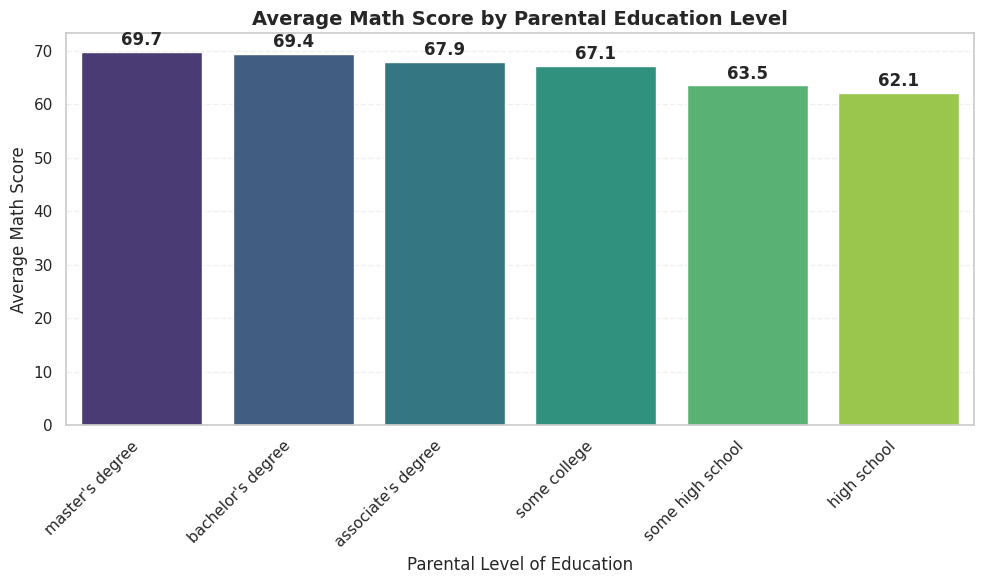

In [ ]:
# Sort the data
edu_order = df.groupby('parental_level_of_education')['math_score'].mean().sort_values(ascending=False)
avg_scores = edu_order.values
labels = edu_order.index

# Set up the plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=labels,
    y=avg_scores,
    hue=labels,
    palette=sns.color_palette("viridis", len(avg_scores))
)

# Add value labels on top of bars
for i, score in enumerate(avg_scores):
    plt.text(i, score + 0.5, f"{score:.1f}", ha='center', va='bottom', fontweight='bold')

# Formatting
plt.title("Average Math Score by Parental Education Level", fontsize=14, weight='bold')
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Math Score")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Is there a significant score difference between males and females across all subjects?
df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


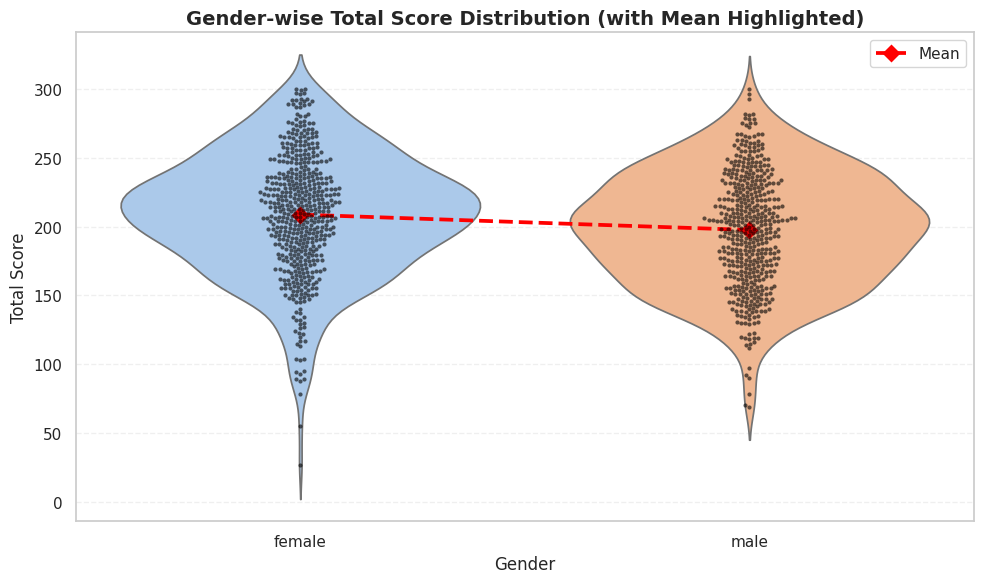

In [ ]:
# Violin plot for distribution
sns.violinplot(data=df, x='gender', y='total_score', inner=None, palette='pastel',hue='gender')

# Swarmplot for individual points
sns.swarmplot(data=df, x='gender', y='total_score', color='k', size=3, alpha=0.6)

# Overlay mean value
sns.pointplot(
    data=df,
    x='gender',
    y='total_score',
    estimator='mean',
    color='red',
    markers='D',
    linestyles='--',
    errorbar=None,
    label='Mean'
)

plt.title("Gender-wise Total Score Distribution (with Mean Highlighted)", fontsize=14, weight='bold')
plt.ylabel("Total Score")
plt.xlabel("Gender")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# 3. How much does completing the test preparation course improve performance in each subject?
df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean()

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


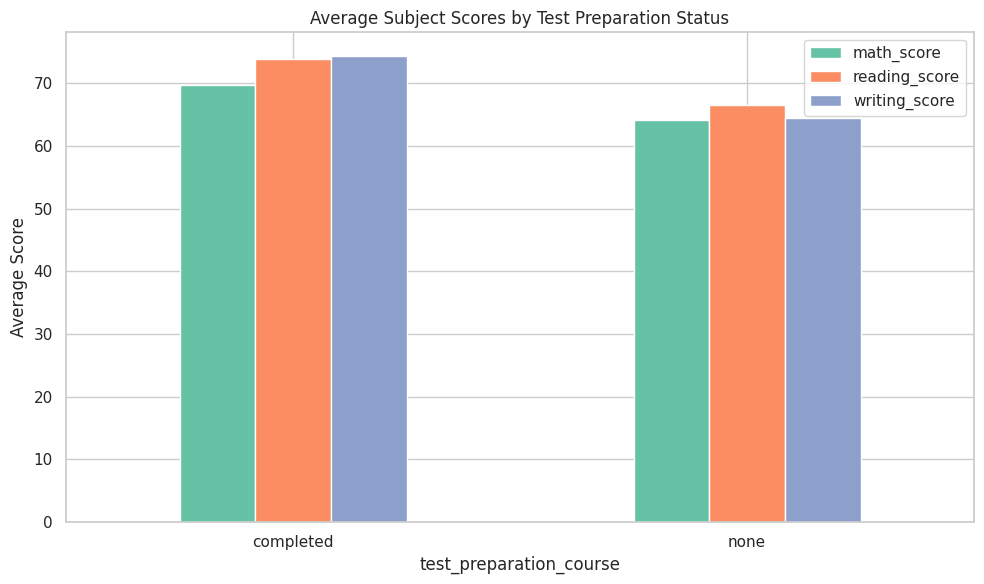

In [ ]:
prep_effect = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean().round(1)
prep_effect.plot(kind='bar')
plt.title("Average Subject Scores by Test Preparation Status")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Which combination of gender, lunch type, and test preparation status produces the top 10% of scores?
df['total_score'] = df[['math_score', 'reading_score', 'writing_score']].sum(axis=1)
threshold = df['total_score'].quantile(0.90)
top_10 = df[df['total_score'] >= threshold]

top_10.groupby(['gender', 'lunch', 'test_preparation_course']).size().reset_index(name='count')

,gender,lunch,test_preparation_course,count
0,female,free/reduced,completed,6
1,female,free/reduced,none,2
2,female,standard,completed,29
3,female,standard,none,31
4,male,free/reduced,completed,3
5,male,free/reduced,none,2
6,male,standard,completed,20
7,male,standard,none,9


In [ ]:
top_10.shape[0]

102

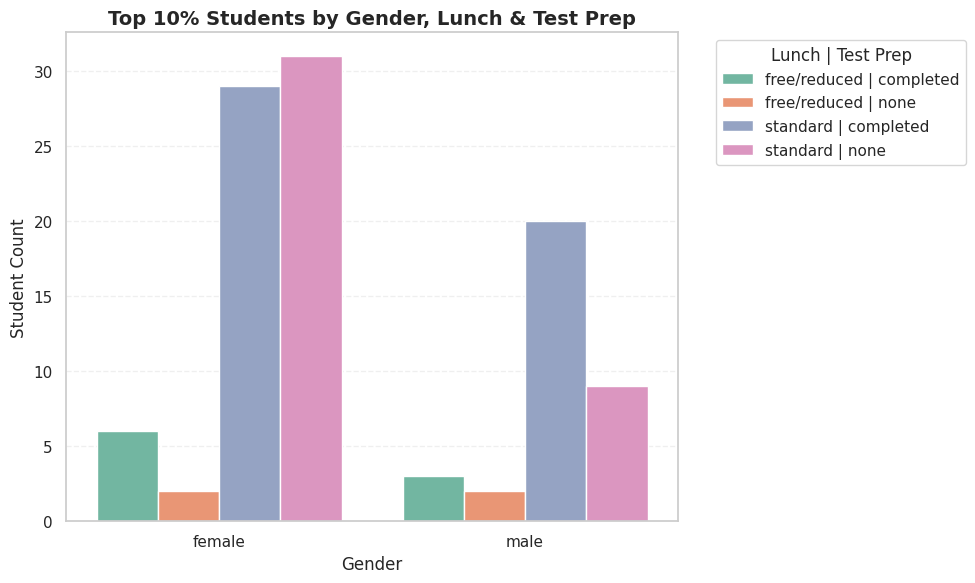

In [ ]:
# Grouping Top 10% Students
top_10_thresh = df['total_score'].quantile(0.90)
top_10_df = df[df['total_score'] >= top_10_thresh].copy()  # Safe copy to avoid warning

# Combine lunch and test prep info
top_10_df['lunch_testprep'] = top_10_df['lunch'] + ' | ' + top_10_df['test_preparation_course']

# Group and count
grouped_top10 = top_10_df.groupby(['gender', 'lunch_testprep']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_top10, x='gender', y='count', hue='lunch_testprep', palette='Set2')
plt.title("Top 10% Students by Gender, Lunch & Test Prep", fontsize=14, weight='bold')
plt.xlabel("Gender")
plt.ylabel("Student Count")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Lunch | Test Prep", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# 5. Does lunch type have a uniform impact across all race/ethnicity groups, or does its effect vary?
grouped_lunch_race = df.groupby(['race/ethnicity', 'lunch'])[['math_score', 'reading_score', 'writing_score', 'total_score']].mean().round(2)
grouped_lunch_race.reset_index(inplace=True)
grouped_lunch_race

,race/ethnicity,lunch,math_score,reading_score,writing_score,total_score
0,group A,free/reduced,55.22,60.56,57.19,172.97
1,group A,standard,65.98,67.47,66.40,199.85
2,group B,free/reduced,57.43,63.97,61.52,182.93
3,group B,standard,66.88,69.28,67.93,204.09
4,group C,free/reduced,56.41,63.41,61.41,181.24
5,group C,standard,68.94,72.27,71.40,212.60
6,group D,free/reduced,61.12,66.43,66.45,194.00
7,group D,standard,70.92,72.08,72.25,215.24
8,group E,free/reduced,66.56,68.73,67.20,202.49
9,group E,standard,76.83,74.81,73.15,224.79


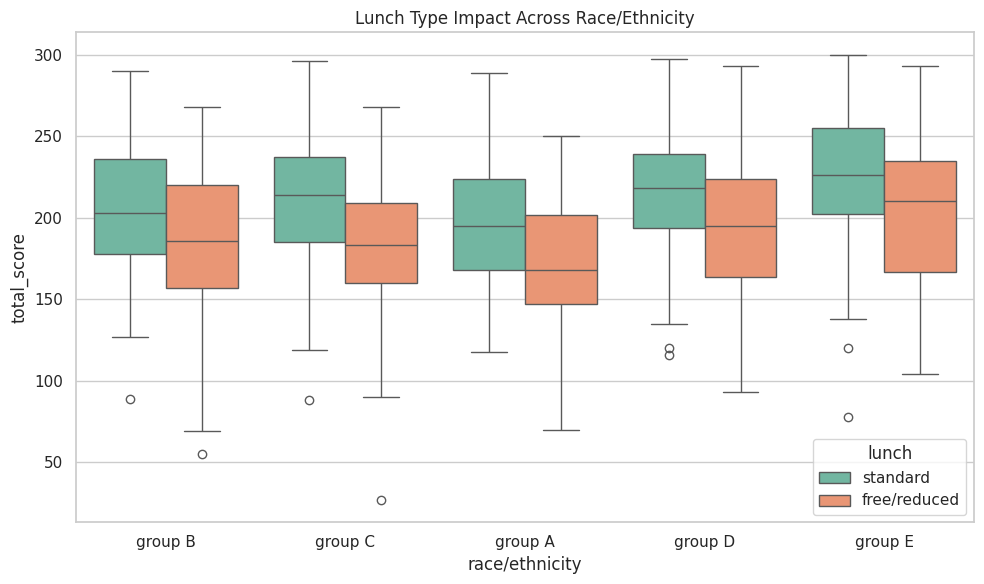

In [ ]:
plt.figure()
sns.boxplot(data=df, x='race/ethnicity', y='total_score', hue='lunch')
plt.title("Lunch Type Impact Across Race/Ethnicity")
plt.tight_layout()
plt.show()

In [ ]:
# 6. What is the correlation between reading and writing scores? Is it stronger than math and writing?
df[['math_score', 'reading_score', 'writing_score']].corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


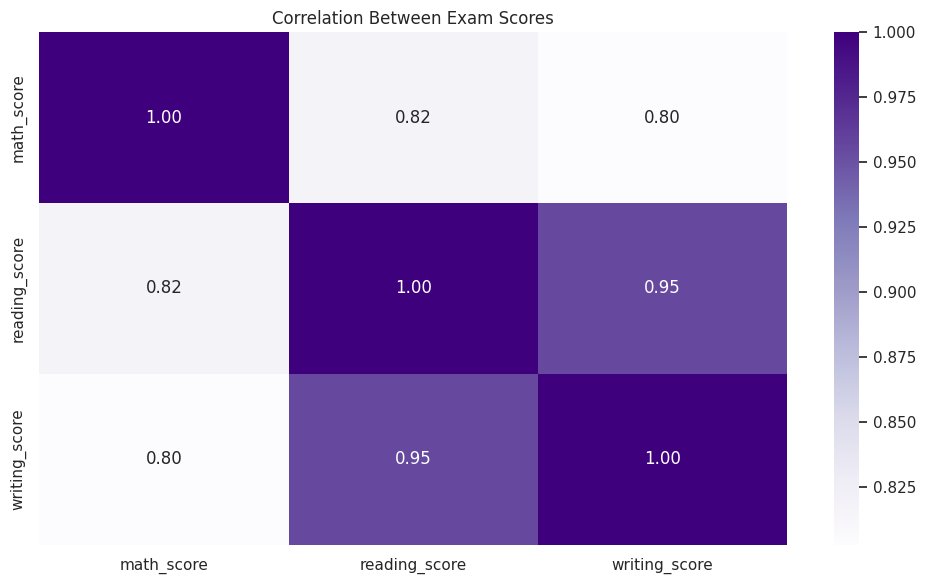

In [ ]:
plt.figure()
sns.heatmap(df[['math_score', 'reading_score', 'writing_score']].corr(), annot=True, cmap='Purples', fmt='.2f')
plt.title("Correlation Between Exam Scores")
plt.tight_layout()
plt.show()

In [ ]:
# 7. Identify the top 5% performing students and analyze their demographic profiles. What patterns emerge?

# Calculate the 95th percentile threshold
top_5_threshold = df['total_score'].quantile(0.95)
# Filter top 5% students
top_5_df = df[df['total_score'] >= top_5_threshold]
# Analyze their demographics
demographic_summary = top_5_df.groupby(['gender', 'race/ethnicity', 'parental_level_of_education', 'test_preparation_course']).size().reset_index(name='count')

demographic_summary.sort_values(by='count', ascending=False)

,gender,race/ethnicity,parental_level_of_education,test_preparation_course,count
21,female,group E,associate's degree,none,3
20,female,group E,associate's degree,completed,2
1,female,group B,associate's degree,completed,2
9,female,group C,some college,completed,2
15,female,group D,master's degree,none,2
7,female,group C,bachelor's degree,completed,2
22,female,group E,bachelor's degree,completed,2
34,male,group C,bachelor's degree,completed,2
25,female,group E,master's degree,completed,2
32,male,group C,associate's degree,completed,2


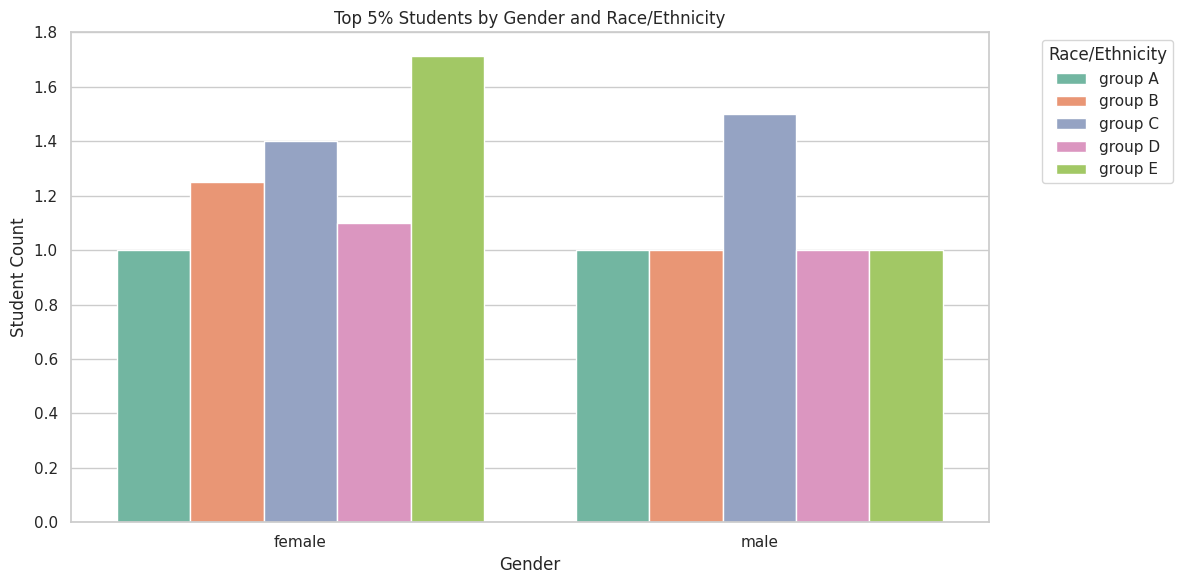

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=demographic_summary,
    x='gender',
    y='count',
    hue='race/ethnicity',
    errorbar=None,
    palette='Set2'
)
plt.title("Top 5% Students by Gender and Race/Ethnicity")
plt.ylabel("Student Count")
plt.xlabel("Gender")
plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# 8. Can we cluster students into performance categories (e.g., low, medium, high performers) using just Pandas logic? If yes, how?
# Create performance categories based on total_score
def performance_category(score):
    if score >= df['total_score'].quantile(0.75):
        return 'High'
    elif score >= df['total_score'].quantile(0.25):
        return 'Medium'
    else:
        return 'Low'

df['performance_category'] = df['total_score'].apply(performance_category)

,performance_category
0,Medium
1,High
2,High
3,Low
4,Medium
...,...
995,High
996,Low
997,Medium
998,Medium


In [ ]:
df['performance_category'].value_counts()

,count
performance_category,
Medium,499
High,254
Low,247


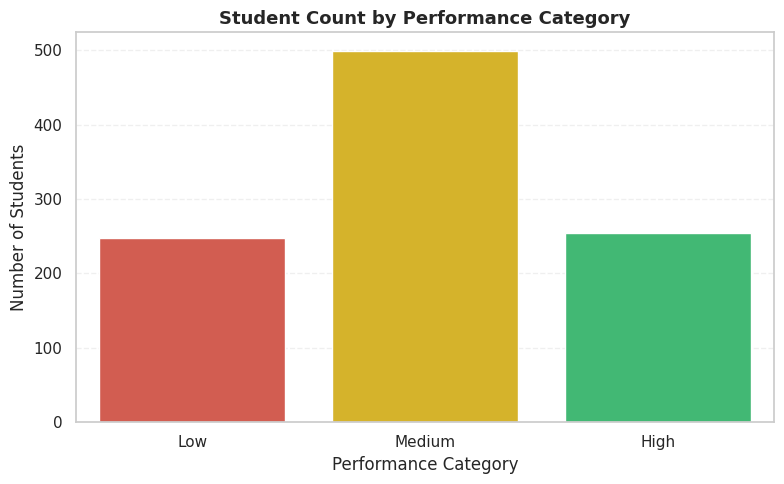

In [ ]:
# Define color palette
category_colors = {
    'Low': '#e74c3c',      # Red
    'Medium': '#f1c40f',   # Yellow
    'High': '#2ecc71'      # Green
}

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='performance_category',
    order=['Low', 'Medium', 'High'],
    hue='performance_category',
    palette=category_colors
)

plt.title("Student Count by Performance Category", fontsize=13, weight='bold')
plt.xlabel("Performance Category")
plt.ylabel("Number of Students")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# --- Save EDA-enriched CSV for Power BI ---
df.to_csv("cleaned_student_performance.csv", index=False)
print("Saved: cleaned_student_performance.csv")

Saved: cleaned_student_performance.csv
